# Oh No! A No-Show! An Anlysis on Why Patients Don’t Show Up for Appointments
The aim of this project is to answer the following question: What factors affect the likelihood of patients not showing up for their appointments?

## Table of Contents
<ul>
<li><a href="#data">Data</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#da">Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='data'></a>
## 1. Data
The [Medical Appointment No Shows Dataset](https://www.kaggle.com/datasets/joniarroba/noshowappointments/data) consists of 110,527 medical appointment records.
### 1.1 Data Dictionary
>- PatientId: identification of a patient
>- AppointmentID: identification of each appointment
>- Gender: male or female
>- DataMarcacaoConsulta: the day of the actual appointment
>- DataAgendamento: The day someone called or registered the appointment
>- Age: how old is the patient
>- Neighbourhood: where the appointment takes place
>- Scholarship: true or false
>- Diabetes: true or false
>- Alcoholism: true or false
>- Handcap: true or false
>- SMS_received: 1 or more messages sent to the patient
>- No-show: true or false

<a id='wrangling'></a>
## 2. Data Wrangling
Import pandas and numpy

In [2]:
import numpy as np
import pandas as pd

Load data and display the first 5 records

In [3]:
df = pd.read_csv("noshow.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Display data shape

In [4]:
df.shape

(110527, 14)

Display data info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Check for nulls in the data

In [6]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Check for duplicates in the data

In [7]:
df.duplicated().sum()

0

Correct "ScheduledDay" and "AppointmentDay" data types

In [8]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

Confirm correction

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

<a id='da'></a>
## 3. Data Analysis
### 3.1 Are patients more likley to show up?

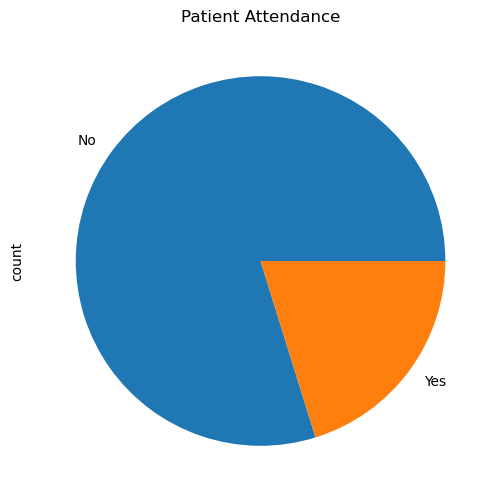

In [10]:
df['No-show'].value_counts().plot(kind='pie', figsize=(6, 6), title= "Patient Attendance");

The graph above shows that patients are more likley to show up.

### 3.2 What kind of patients are more likley to not show up?

In [11]:
def plot_my_col(df, col):
    # plot with title and axies labels
    df.groupby(col)['No-show'].value_counts().unstack().plot(
    kind="bar",
    title= f"Effect of {col} on Patient Attendance",
    legend=True,
    ylabel="Frequency",
    xlabel=f"{col}",
    rot=0,
    figsize=(12, 8)
);

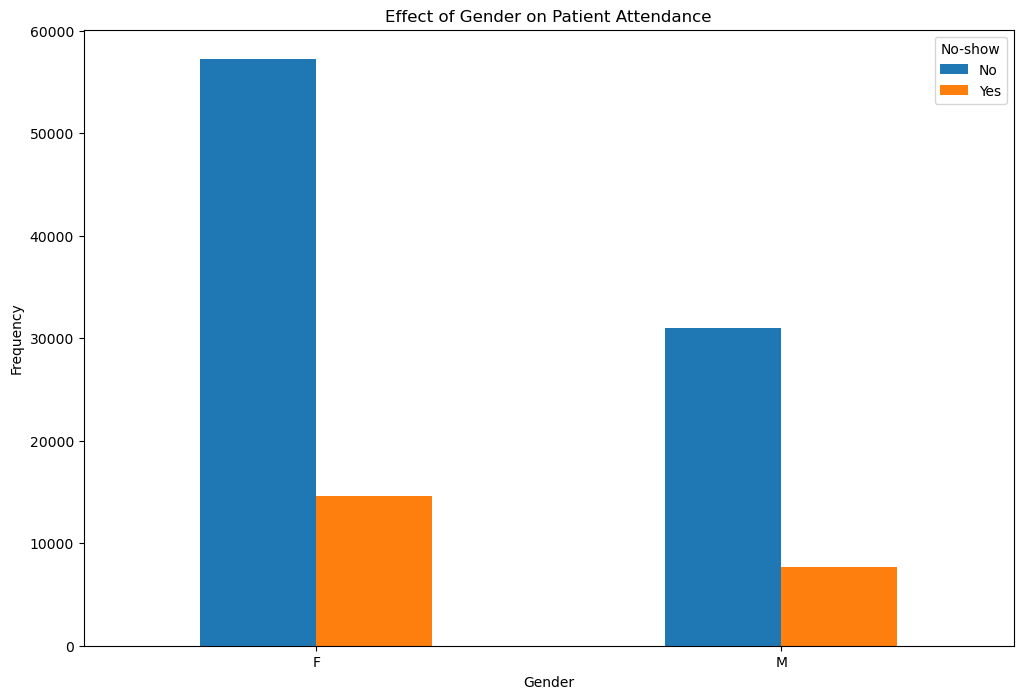

In [12]:
plot_my_col(df, 'Gender')

The graph above shows that female patients are more likley to not show up.

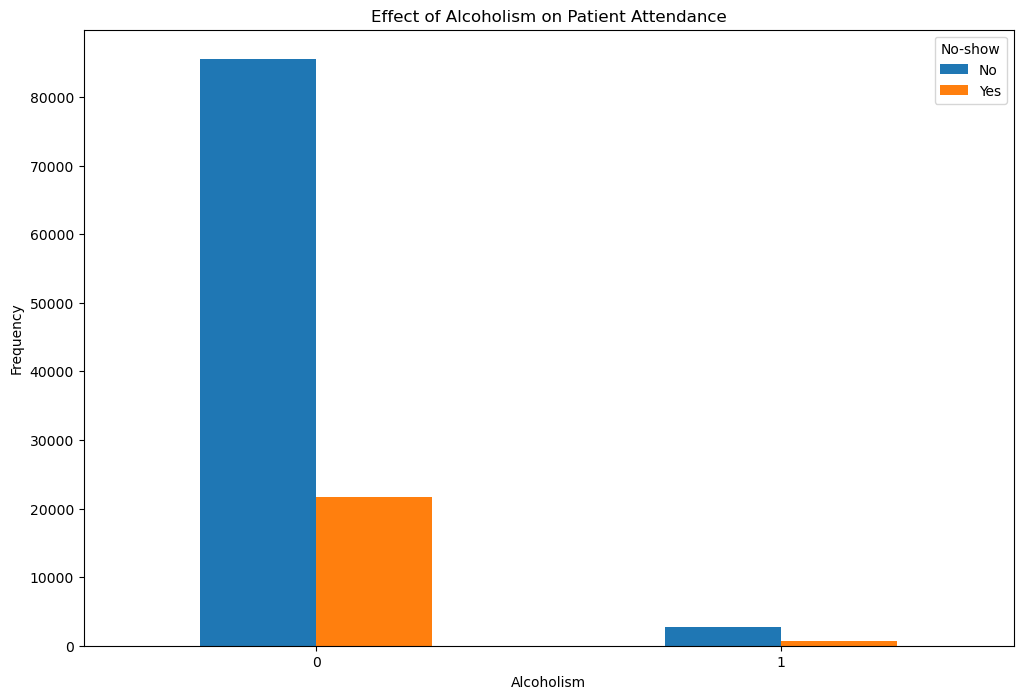

In [13]:
plot_my_col(df, 'Alcoholism')

The graph above shows that alcoholic patients are less likley to not show up.

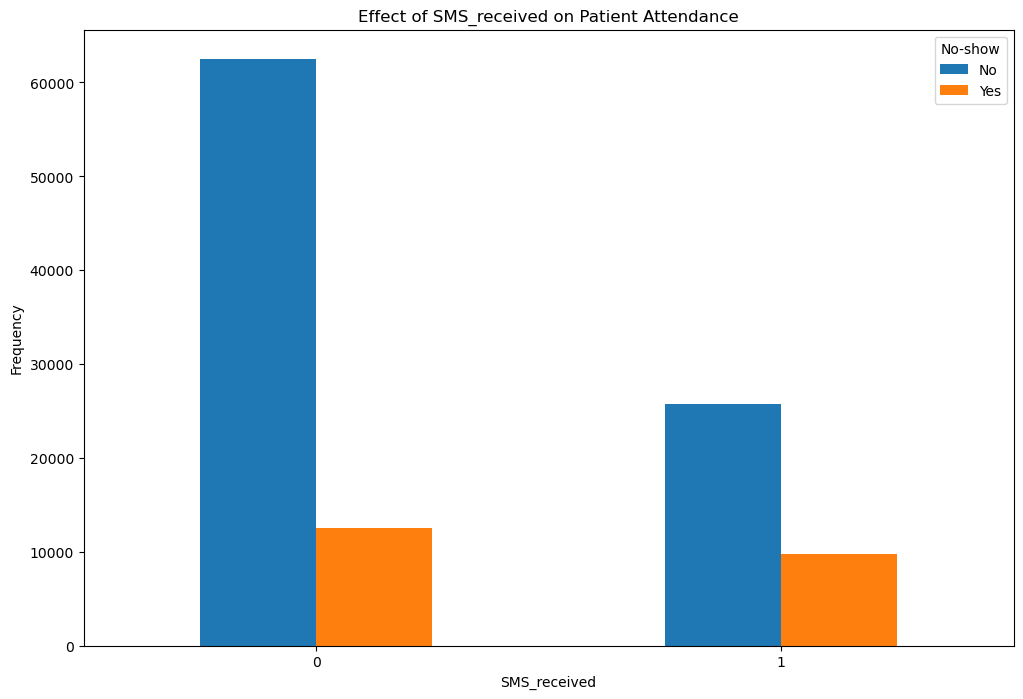

In [14]:
plot_my_col(df, 'SMS_received')

The graph above shows that patients who did not recive SMS reminders are more likley to not show up.

In [15]:
df_absent = df[df['No-show'] == 'Yes']

In [16]:
df_absent['Neighbourhood'].value_counts().idxmax()

'JARDIM CAMBURI'

The result above shows that patients who live in Jardim Camburi are more likley to not show up.

<a id='conclusions'></a>
## 4. Conclusions
- Patients are more likley to show up.
- Female patients are more likley to not show up.
- Alcoholic patients are less likley to not show up.
- Patients who did not recive SMS reminders are more likley to not show up.
- Patients who live in Jardim Camburi are more likley to not show up.